# WeatherPy
----

### Analysis
* Since it is summer season for the southern hemisphere, the lat vs max temperature shows the higher temp area is between 20 to -40 degrees (more towards the souther part). Majority cities in southern hemispher is above 60 degrees.  This should be caused by the distance between the Sun and the Earth (not studied in this project).
* Humidity has no strong pattern. Souther hemispher humidity is slightly higher. Locations close to equator is higher as well.
* There is no strong pattern between latitude and cloudiness. See more cities have nearly 0 cloudiness in the equator area.
* Most cities on earth have wind speed below 20 mph. See more cities have strong wind in the northern hemispher, the higher the altitude, the stronger the wind speed.

---

#### Note
* Instructions have been included for each segment. 

In [78]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint


# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from datetime import datetime

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [79]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

581

In [80]:
#Remove duplicate cities
cities_df = pd.DataFrame(cities)
cities_df.columns = ['City']
cities_df.count()
cities_df.head()

,City
0,oxford
1,rikitea
2,nakuru
3,bredasdorp
4,ushuaia


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [81]:
# Loop through the list of cities and add the data to lists
url = "http://api.openweathermap.org/data/2.5/weather?"
# Get F instead of C temperature
units = "imperial"

# Create empty list to hold json values
lat=[]
lon=[]
max_temp=[]
humidity=[]
clouds=[]
wind=[]
country=[]
date=[]
city_name=[]


# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Print beginning message
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Setup initial value for row count and set count
row_count = 1
set_count = 1


#weather_cities=[]

for city in cities:
    
    try:
        response=requests.get(query_url+city).json()
        #print(query_url+city)
        print(f'Processing Record {row_count} of Set {set_count} | {city}' )
    
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])  
        date.append(response["dt"])
    except:
        print("City not found. Skipping...")
        
    row_count += 1
    if row_count == 51: 
        row_count = 1 
        set_count += 1
    

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | oxford
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | nakuru
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | touros
Processing Record 7 of Set 1 | luderitz
Processing Record 8 of Set 1 | ancud
Processing Record 9 of Set 1 | klaksvik
Processing Record 10 of Set 1 | saint anthony
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | maracas
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | souillac
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | minab
Processing Record 19 of Set 1 | andenes
City not found. Skipping...
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | bellefontaine
Processing Record 22 of Set 1 | kaitangata


Processing Record 36 of Set 4 | neuquen
Processing Record 37 of Set 4 | ariano irpino
Processing Record 38 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 39 of Set 4 | pangai
Processing Record 40 of Set 4 | poso
Processing Record 41 of Set 4 | ambanja
Processing Record 42 of Set 4 | severnyy
City not found. Skipping...
Processing Record 43 of Set 4 | luanda
Processing Record 44 of Set 4 | saint-augustin
Processing Record 45 of Set 4 | micheweni
Processing Record 46 of Set 4 | sinnamary
Processing Record 47 of Set 4 | flagstaff
Processing Record 48 of Set 4 | ambilobe
Processing Record 49 of Set 4 | fuling
Processing Record 50 of Set 4 | vao
Processing Record 1 of Set 5 | narsaq
Processing Record 2 of Set 5 | butaritari
Processing Record 3 of Set 5 | kazalinsk
City not found. Skipping...
Processing Record 4 of Set 5 | sao jose da coroa grande
Processing Record 5 of Set 5 | esil
Processing Record 6 of Set 5 | kupang
Processing Record 7 of Set 5 | kaeo
Processing Re

Processing Record 21 of Set 8 | namatanai
Processing Record 22 of Set 8 | lavrentiya
Processing Record 23 of Set 8 | peyima
Processing Record 24 of Set 8 | sao filipe
Processing Record 25 of Set 8 | tuktoyaktuk
Processing Record 26 of Set 8 | kattivakkam
Processing Record 27 of Set 8 | robertsport
Processing Record 28 of Set 8 | ustrzyki dolne
Processing Record 29 of Set 8 | malegaon
Processing Record 30 of Set 8 | atar
Processing Record 31 of Set 8 | maarianhamina
City not found. Skipping...
Processing Record 32 of Set 8 | leningradskiy
Processing Record 33 of Set 8 | sinegorye
Processing Record 34 of Set 8 | veraval
Processing Record 35 of Set 8 | haines junction
Processing Record 36 of Set 8 | chirongui
Processing Record 37 of Set 8 | beberibe
Processing Record 38 of Set 8 | babanusah
City not found. Skipping...
Processing Record 39 of Set 8 | mulchen
Processing Record 40 of Set 8 | komsomolskiy
Processing Record 41 of Set 8 | kuopio
Processing Record 42 of Set 8 | pacifica
Processi

Processing Record 7 of Set 12 | shahrud
Processing Record 8 of Set 12 | fayetteville
Processing Record 9 of Set 12 | flin flon
Processing Record 10 of Set 12 | labytnangi
Processing Record 11 of Set 12 | bicas
Processing Record 12 of Set 12 | nouadhibou
Processing Record 13 of Set 12 | kimbe
Processing Record 14 of Set 12 | tsiroanomandidy
Processing Record 15 of Set 12 | lyngseidet
Processing Record 16 of Set 12 | liverpool
Processing Record 17 of Set 12 | boguchar
Processing Record 18 of Set 12 | mitsamiouli
Processing Record 19 of Set 12 | pemangkat
City not found. Skipping...
Processing Record 20 of Set 12 | dalvik
Processing Record 21 of Set 12 | port moresby
Processing Record 22 of Set 12 | vila velha
Processing Record 23 of Set 12 | cazaje
City not found. Skipping...
Processing Record 24 of Set 12 | chiredzi
Processing Record 25 of Set 12 | urusha
Processing Record 26 of Set 12 | hobyo
Processing Record 27 of Set 12 | villa carlos paz
Processing Record 28 of Set 12 | turkan
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [82]:
weather_dict={
    "City":city_name,
    "Cloudiness":clouds,
    "Country":country,            
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lon,
    "Max Temp":max_temp,
    "Wind Speed":wind,
}

weather_data=pd.DataFrame(weather_dict)
weather_data.count()

City          515
Cloudiness    515
Country       515
Date          515
Humidity      515
Lat           515
Lng           515
Max Temp      515
Wind Speed    515
dtype: int64

In [83]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Oxford,1,US,1547265360,62,33.61,-85.83,44.06,4.70
1,Rikitea,80,PF,1547266673,100,-23.12,-134.97,79.36,17.25
2,Nakuru,0,KE,1547266721,87,-0.28,36.07,46.15,4.16
3,Bredasdorp,32,ZA,1547262000,76,-34.53,20.04,53.60,5.82
4,Ushuaia,75,AR,1547265600,48,-54.81,-68.31,46.40,11.41


In [84]:
# Get a statistic view of the data set and check if any out range value
weather_data.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,515.000000,5.150000e+02,515.000000,515.000000,515.000000,515.000000,515.000000
mean,38.817476,1.547266e+09,77.236893,20.632951,17.470000,47.196058,8.342330
std,35.619936,1.318031e+03,20.566637,33.544916,88.301614,32.810617,6.250799
min,0.000000,1.547261e+09,0.000000,-54.810000,-174.350000,-43.180000,0.360000
25%,0.000000,1.547266e+09,68.000000,-5.380000,-56.035000,30.005000,3.360000
50%,36.000000,1.547267e+09,82.000000,24.090000,16.590000,54.340000,6.290000
75%,75.000000,1.547267e+09,93.000000,49.355000,94.345000,73.665000,11.410000
max,100.000000,1.547267e+09,100.000000,78.220000,178.420000,109.400000,43.870000


In [86]:
# This part handles extreme high value on humidity
# Using index to identify any value over 100 and drop it
ErrRow=weather_data["Humidity"].idxmax()
weather_data.iloc[ErrRow]
ErValue=weather_data["Humidity"].values[ErrRow]
if ErValue > 100 : 
    weather_data.drop(ErrRow, inplace=True)
weather_data.count()

City          515
Cloudiness    515
Country       515
Date          515
Humidity      515
Lat           515
Lng           515
Max Temp      515
Wind Speed    515
dtype: int64

In [87]:
# Save final data as csv file
weather_data.to_csv("output/cities.csv", encoding='utf-8', index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

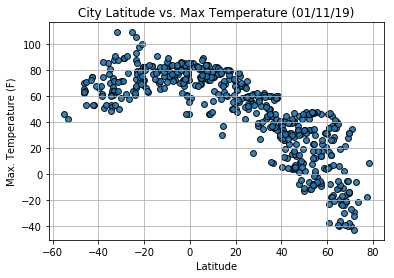

In [101]:
#Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=35, alpha=0.9,
    edgecolor="black")

# Incorporate the other graph properties and date
plt.title(f'City Latitude vs. Max Temperature ({datetime.now():%m/%d/%y})')
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("images/CityLatVsMaxTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

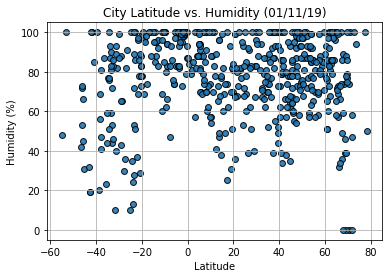

In [100]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=35, alpha=0.9,
    edgecolor="black")

# Incorporate the other graph properties and date
plt.title(f'City Latitude vs. Humidity ({datetime.now():%m/%d/%y})')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("images/CityLatVsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

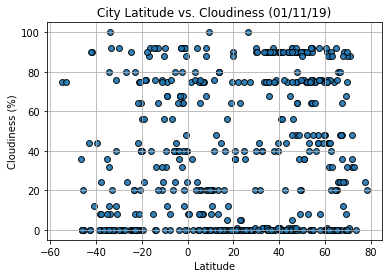

In [99]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=35, alpha=0.9,
    edgecolor="black")

# Incorporate the other graph properties and date
plt.title(f'City Latitude vs. Cloudiness ({datetime.now():%m/%d/%y})')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("images/CityLatVsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

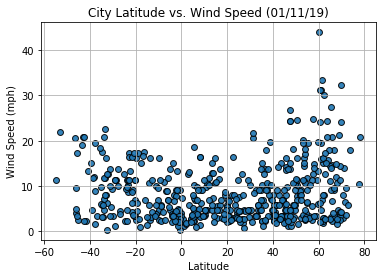

In [98]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=35, alpha=0.9,
    edgecolor="black")

# Incorporate the other graph properties and date
plt.title(f'City Latitude vs. Wind Speed ({datetime.now():%m/%d/%y})')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("images/CityLatVsWindSpeed.png")

# Show plot
plt.show()